# Работа с API

API – это механизмы, которые позволяют двум программным компонентам взаимодействовать друг с другом, используя набор определений и протоколов. Например, система ПО метеослужбы содержит ежедневные данные о погоде. Приложение погоды на телефоне «общается» с этой системой через API и показывает ежедневные обновления погоды на телефоне.

С помощью API можно легко собрать нужную информацию из сайта или приложения.

# На примере HH

In [ ]:
# !pip install -U requests

https://github.com/hhru/api

In [1]:
import requests

import pandas as pd

In [15]:
url = 'https://api.hh.ru/vacancies'

text = 'аналитик данных'

# text = 'NAME:("data analyst" OR "аналитик данных")'

In [16]:
parameters = {
    'vacancy_search_fields': 'name',
    'text': text,
    'area': '113',
    'per_page': '10',
    'page': 1,
    'responses_count_enabled': True,
}

In [17]:
r = requests.get(url, params=parameters)
r

<Response [200]>

In [18]:
vacancies_info = r.json()

In [19]:
vacancies_info

{'items': [{'id': '88051603',
   'premium': False,
   'name': 'Стажер-программист',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '2',
    'name': 'Санкт-Петербург',
    'url': 'https://api.hh.ru/areas/2'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Санкт-Петербург',
    'street': 'Ярославский проспект',
    'building': '95',
    'lat': 60.027561,
    'lng': 30.316183,
    'description': None,
    'raw': 'Санкт-Петербург, Ярославский проспект, 95',
    'metro': {'station_name': 'Озерки',
     'line_name': 'Московско-Петроградская',
     'station_id': '15.211',
     'line_id': '15',
     'lat': 60.037098,
     'lng': 30.321495},
    'metro_stations': [{'station_name': 'Озерки',
      'line_name': 'Московско-Петроградская',
      'station_id': '15.211',
      'line_id': '15',
      'lat': 60.037098,
      'lng': 30.321495},
     {'station_name': 'Удельная',
      'line_name': 'Московско-

In [20]:
for vac in vacancies_info['items']:
    print(vac["name"])

Стажер-программист
QA Engineer (News team)
Аналитик
Аналитик отдела продаж
Оператор на первичную документацию в отдел логистики
Разработчик Python (junior)
Заместитель финансового директора
Java-разработчик
Дизайнер интерфейсов мобильных приложений
Аналитик данных/Data Analyst (Looker Studio/Google Data Studio)


In [21]:
df_quotes = pd.DataFrame({
    'id':[],
    'name':[],
    'salary':[],
    'company':[],
    'url': []
})

In [22]:
df_quotes.head(5)

,id,name,salary,company,url


In [23]:
for vac in vacancies_info['items']:
    vac_parser = {
        'id': vac['id'],
        'name': vac['name'],
        'salary': vac['salary'],
        'company': vac['employer']['name'],
        'url': vac['url']
    }
    df_quotes.loc[len(df_quotes)] = vac_parser

In [24]:
df_quotes

,id,name,salary,company,url
0,88051603,Стажер-программист,None,Уно-Софт,https://api.hh.ru/vacancies/88051603?host=hh.ru
1,88147799,QA Engineer (News team),None,TradingView,https://api.hh.ru/vacancies/88147799?host=hh.ru
2,87001237,Аналитик,"{'from': 50000, 'to': 70000, 'currency': 'RUR'...",BusinesStat,https://api.hh.ru/vacancies/87001237?host=hh.ru
3,87612597,Аналитик отдела продаж,"{'from': 130000, 'to': 150000, 'currency': 'RU...",Коныгина Анастасия Игоревна,https://api.hh.ru/vacancies/87612597?host=hh.ru
4,88013172,Оператор на первичную документацию в отдел лог...,"{'from': 45000, 'to': 45000, 'currency': 'RUR'...",ВторРесурс,https://api.hh.ru/vacancies/88013172?host=hh.ru
5,86324076,Разработчик Python (junior),"{'from': None, 'to': 80000, 'currency': 'RUR',...",ANABAR,https://api.hh.ru/vacancies/86324076?host=hh.ru
6,88044405,Заместитель финансового директора,None,Вальтер Хеми,https://api.hh.ru/vacancies/88044405?host=hh.ru
7,87732169,Java-разработчик,None,Calltouch,https://api.hh.ru/vacancies/87732169?host=hh.ru
8,88062572,Дизайнер интерфейсов мобильных приложений,None,Tele2,https://api.hh.ru/vacancies/88062572?host=hh.ru
9,87372226,Аналитик данных/Data Analyst (Looker Studio/Go...,"{'from': 40000, 'to': None, 'currency': 'RUR',...",Дабл Ап,https://api.hh.ru/vacancies/87372226?host=hh.ru


In [25]:
vacancies_info['found']

15671

# Парсинг с помощью BeautifulSoup

Beautiful Soup - это библиотека для Python, которая позволяет парсить (анализировать) HTML и XML документы. Она предоставляет удобный способ искать, навигировать, и модифицировать дерево DOM (Document Object Model), представляющее HTML/XML документ.

In [22]:
# !pip install -U beautifulsoup4

In [26]:
from bs4 import BeautifulSoup

In [55]:
url_2 = 'http://quotes.toscrape.com/'

In [56]:
r = requests.get(url_2, verify=False, timeout=10)
r

<Response [200]>

In [57]:
soup = BeautifulSoup(r.content, 'html.parser')

In [58]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

In [59]:
divs = soup.find_all('div', attrs={'class':'quote'})

In [60]:
df_quotes = pd.DataFrame({
    'text':[],
    'author':[],
    'author_url':[],
    'tags':[],
})

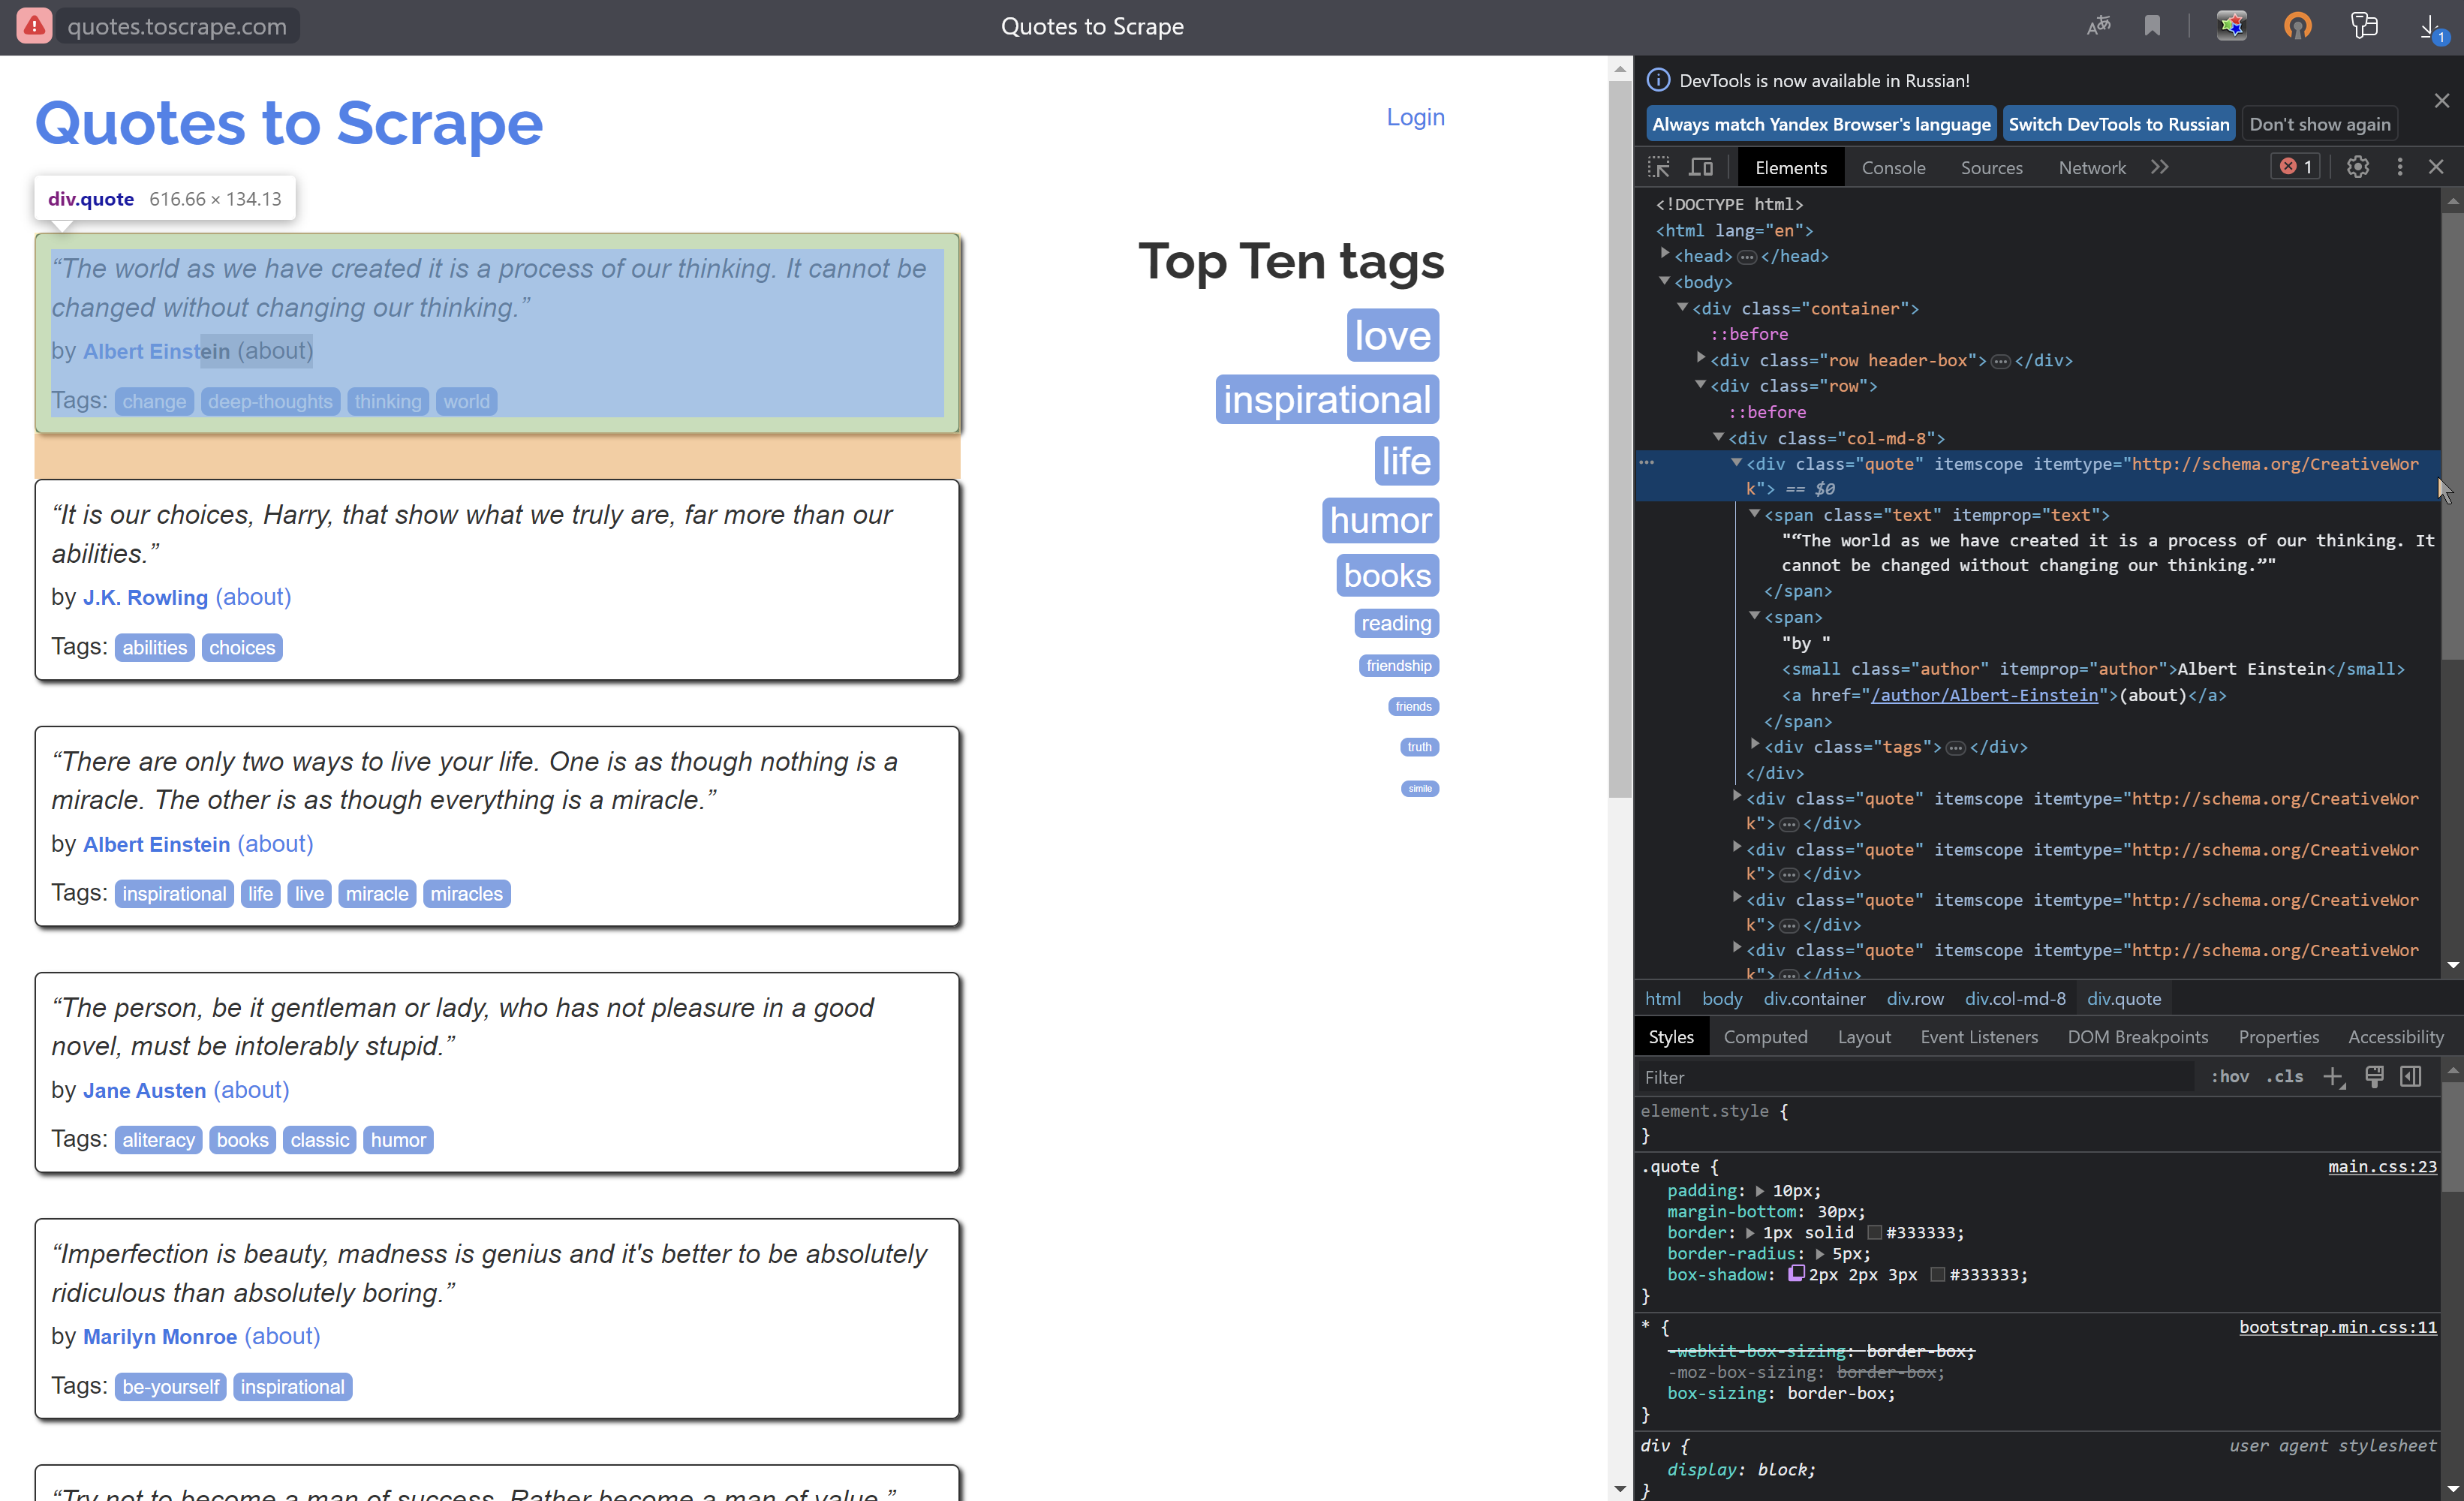

In [62]:
def get_quotes(soup, data=df_quotes):
    divs = soup.find_all('div', attrs={'class':'quote'})
    for div in divs:
        quote = {}
        quote['text'] = div.find('span', class_='text').text
        quote['author'] = div.find('small', class_='author').text
        quote['author_url'] = div.find_all('span')[1].find('a').get('href')
        tags = []
        for a_tag in div.find('div', class_='tags').find_all('a', class_='tag'):
            tags.append(a_tag.text)
        quote['tags'] = ', '.join(tags)
        df_quotes.loc[len(df_quotes)] = quote

In [51]:
df_quotes

,text,author,author_url,tags


In [63]:
url_page = 'https://quotes.toscrape.com/page/'

for i in range(1, 21):
    print(f'Page N:{i}')
    r = requests.get(url_page + str(i), timeout=10)
    soup = BeautifulSoup(r.content, 'html.parser')
    
    get_quotes(soup, df_quotes)
    
    if 'No quotes found!' in soup.text:
        break

Page N:1
Page N:2
Page N:3
Page N:4
Page N:5
Page N:6
Page N:7
Page N:8
Page N:9
Page N:10
Page N:11


In [65]:
df_quotes

,text,author,author_url,tags
0,“The world as we have created it is a process ...,Albert Einstein,/author/Albert-Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,/author/J-K-Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,/author/Albert-Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,/author/Jane-Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,/author/Marilyn-Monroe,"be-yourself, inspirational"
...,...,...,...,...
95,“You never really understand a person until yo...,Harper Lee,/author/Harper-Lee,better-life-empathy
96,“You have to write the book that wants to be w...,Madeleine L'Engle,/author/Madeleine-LEngle,"books, children, difficult, grown-ups, write, ..."
97,“Never tell the truth to people who are not wo...,Mark Twain,/author/Mark-Twain,truth
98,"“A person's a person, no matter how small.”",Dr. Seuss,/author/Dr-Seuss,inspirational


In [67]:
df_quotes.shape

(100, 4)